# Fleet_Data_Analysis

## Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import squarify 

## Load and Preview Dataset

In [20]:
df = pd.read_csv('../DataSets/Fleet Data.csv')
df

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3
...,...,...,...,...,...,...,...,...,...,...,...
1578,WestJet,WestJet,Boeing 757,NaN,NaN,1.0,1.0,NaN,$73,$0,NaN
1579,WestJet,WestJet,Boeing 767,4.0,NaN,NaN,4.0,NaN,$187,$748,24.5
1580,WestJet,WestJet Encore,De Havilland Canada DHC-8 Dash 8,33.0,NaN,NaN,33.0,9.0,$31,"$1,033",2.0
1581,Wizz Air,Wizz Air,Airbus A320,63.0,NaN,9.0,72.0,8.0,$98,"$6,174",5.1


## Data Cleaning

In [23]:
df.dtypes

Parent Airline           object
Airline                  object
Aircraft Type            object
Current                 float64
Future                  float64
Historic                float64
Total                   float64
Orders                  float64
Unit Cost                object
Total Cost (Current)     object
Average Age             float64
dtype: object

In [25]:
df = df.rename(columns={'Unit Cost': 'Unit_Cost'})
df = df.rename(columns={'Total Cost (Current)': 'Total_Cost'})

In [27]:
df.columns=df.columns.str.replace(' ','_',regex=True)

In [29]:
df

,Parent_Airline,Airline,Aircraft_Type,Current,Future,Historic,Total,Orders,Unit_Cost,Total_Cost,Average_Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3
...,...,...,...,...,...,...,...,...,...,...,...
1578,WestJet,WestJet,Boeing 757,NaN,NaN,1.0,1.0,NaN,$73,$0,NaN
1579,WestJet,WestJet,Boeing 767,4.0,NaN,NaN,4.0,NaN,$187,$748,24.5
1580,WestJet,WestJet Encore,De Havilland Canada DHC-8 Dash 8,33.0,NaN,NaN,33.0,9.0,$31,"$1,033",2.0
1581,Wizz Air,Wizz Air,Airbus A320,63.0,NaN,9.0,72.0,8.0,$98,"$6,174",5.1


In [31]:
df.Unit_Cost = df.Unit_Cost.replace('[$]','',regex=True).astype('float64')
df.Total_Cost = df.Total_Cost.replace('[$,]','',regex=True).astype('float64')

In [33]:
df.isnull().sum()

Parent_Airline       0
Airline              0
Aircraft_Type        0
Current            724
Future            1395
Historic           470
Total               99
Orders            1235
Unit_Cost           35
Total_Cost          27
Average_Age        763
dtype: int64

In [35]:
df[df.isna().any(axis=1)]

,Parent_Airline,Airline,Aircraft_Type,Current,Future,Historic,Total,Orders,Unit_Cost,Total_Cost,Average_Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,90.0,0.0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,98.0,0.0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,115.0,919.0,10.3
...,...,...,...,...,...,...,...,...,...,...,...
1578,WestJet,WestJet,Boeing 757,NaN,NaN,1.0,1.0,NaN,73.0,0.0,NaN
1579,WestJet,WestJet,Boeing 767,4.0,NaN,NaN,4.0,NaN,187.0,748.0,24.5
1580,WestJet,WestJet Encore,De Havilland Canada DHC-8 Dash 8,33.0,NaN,NaN,33.0,9.0,31.0,1033.0,2.0
1581,Wizz Air,Wizz Air,Airbus A320,63.0,NaN,9.0,72.0,8.0,98.0,6174.0,5.1


In [37]:
df.Current = df.Current.fillna(0)
df.Future = df.Future.fillna(0)
df.Historic = df.Historic.fillna(0)
df.Orders = df.Orders.fillna(0)
df.Average_Age = df.Average_Age.fillna(0)

In [39]:
df = df.dropna()

In [41]:
df

,Parent_Airline,Airline,Aircraft_Type,Current,Future,Historic,Total,Orders,Unit_Cost,Total_Cost,Average_Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,0.0,3.0,4.0,0.0,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,0.0,0.0,8.0,8.0,0.0,90.0,0.0,0.0
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,0.0,3.0,41.0,0.0,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,0.0,0.0,9.0,9.0,0.0,98.0,0.0,0.0
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,0.0,0.0,8.0,0.0,115.0,919.0,10.3
...,...,...,...,...,...,...,...,...,...,...,...
1578,WestJet,WestJet,Boeing 757,0.0,0.0,1.0,1.0,0.0,73.0,0.0,0.0
1579,WestJet,WestJet,Boeing 767,4.0,0.0,0.0,4.0,0.0,187.0,748.0,24.5
1580,WestJet,WestJet Encore,De Havilland Canada DHC-8 Dash 8,33.0,0.0,0.0,33.0,9.0,31.0,1033.0,2.0
1581,Wizz Air,Wizz Air,Airbus A320,63.0,0.0,9.0,72.0,8.0,98.0,6174.0,5.1


In [43]:
df.Total = df.Current + df.Future + df.Historic

C:\Users\lenovo\AppData\Local\Temp\ipykernel_41728\3774311930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Total = df.Current + df.Future + df.Historic


# Descriptive Analysis

In [46]:
df.Aircraft_Type.nunique()

65

The dataset contains a total of 65 unique aircraft types.

In [49]:
df.Aircraft_Type.value_counts().nlargest(20)

Aircraft_Type
Boeing 737                          144
Airbus A320                         128
Airbus A330                          79
Boeing 767                           78
Airbus A319                          72
Airbus A321                          71
Boeing 747                           61
Boeing 757                           55
ATR 42/72                            54
Boeing 777                           53
Airbus A300                          42
McDonnell Douglas DC-8               38
De Havilland Canada DHC-8 Dash 8     38
Embraer ERJ-190                      36
Airbus A340                          36
Boeing 787 Dreamliner                36
McDonnell Douglas DC-10              34
Airbus A310                          32
McDonnell Douglas MD-11              30
McDonnell Douglas MD-80              29
Name: count, dtype: int64

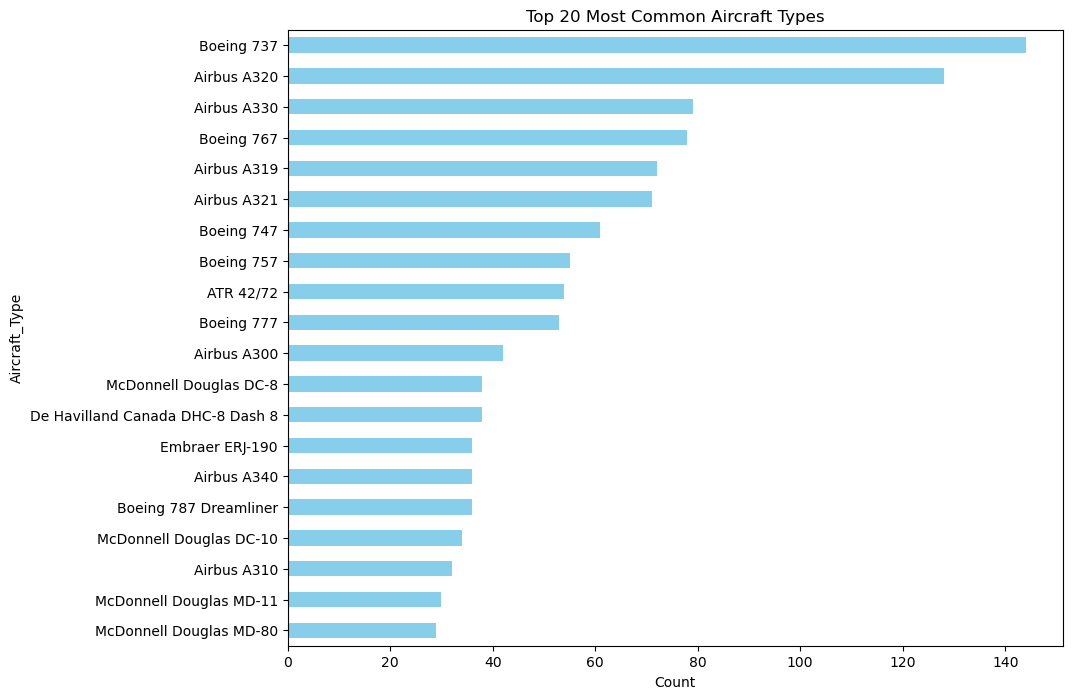

In [51]:
df.Aircraft_Type.value_counts().nlargest(20).plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title("Top 20 Most Common Aircraft Types")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

## 🔍 Insights from Aircraft_Type Distribution :

  1. Dominance of Boeing and Airbus

    - Boeing and Airbus models dominate the top 20, with the Boeing 737 (144) and Airbus A320 (128) taking the lead.
    - This reflects their market leadership in the global commercial aviation sector.

  3. Most Common Aircraft

    - Boeing 737 is the most frequently used aircraft in your dataset — likely the most popular short-haul aircraft globally.
    - Close behind: Airbus A320, another high-volume short/medium-haul aircraft.

  5. Wide Use of Airbus A3XX Series

    - Several Airbus A3-series planes appear frequently (A319, A321, A330, A320, A310, A300, A340).
    - Shows Airbus's strong presence in both single-aisle (A319, A321) and twin-aisle (A330, A340) markets.

  7. Diverse Aircraft Portfolio

    - There are models from different manufacturers:

     • McDonnell Douglas: MD-80, DC-10, MD-11, DC-8
     • Embraer: ERJ-190 (regional jet)
     • De Havilland Canada: DHC-8 Dash 8 (turboprop)
     • ATR: ATR 42/72 (turboprop)

    - This suggests a diverse fleet, including long-haul, short-haul, and regional aircraft.

  5. Legacy Aircraft Still in Use

    - Aircraft like the McDonnell Douglas DC-8, DC-10, MD-11, and MD-80 are relatively older models.
    - Their presence implies that some airlines still operate or have historic fleets of aging aircraft.
    - This could tie into maintenance costs, emissions, or upgrade strategies.

  7. Newer Models Appearing

    - Boeing 787 Dreamliner is in the top 20 – a newer generation aircraft known for fuel efficiency.
    - This may reflect modernization trends in some airline fleets.

In [83]:
df.Parent_Airline.nunique()

113

The dataset contains a total of 113 unique parent airline.

In [18]:
df.Parent_Airline.value_counts().nlargest(20)

Parent_Airline
Lufthansa                 94
IAG                       66
Air France/KLM            62
Avianca                   37
American Airlines         34
Aeroflot                  32
Air China                 32
China Eastern Airlines    30
SAS Group                 27
Qantas Airways            25
Thomas Cook Airlines      23
Air Canada                22
Delta Airlines            22
Thai Airways              21
Japan Airlines            19
Saudi Arabian Airlines    19
Finnair                   19
Qatar Airways             19
China Airlines            19
Vietnam Airlines          19
Name: count, dtype: int64

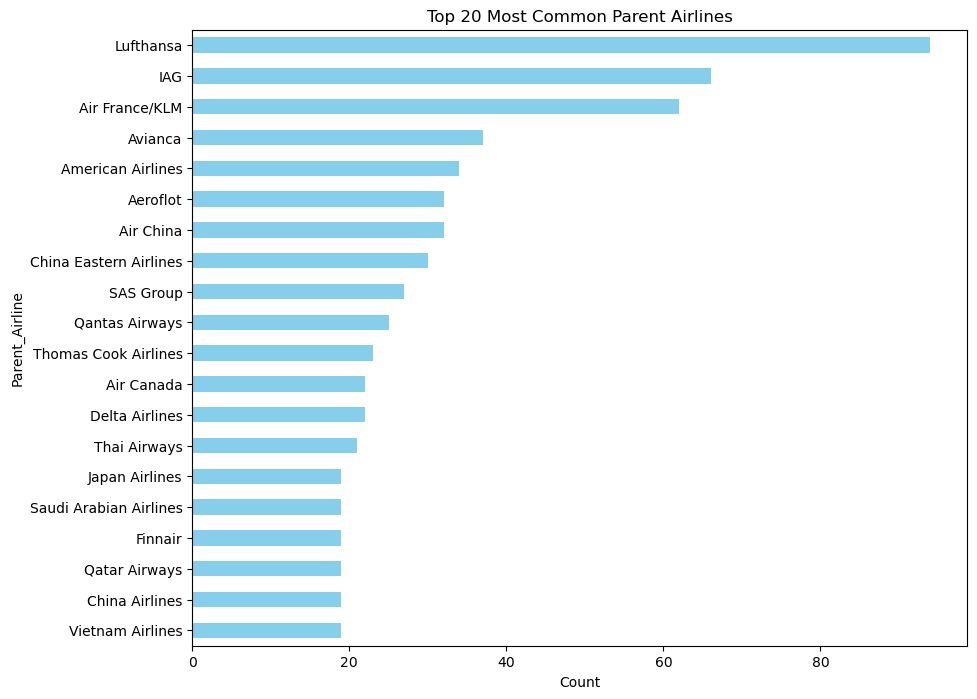

In [58]:
df.Parent_Airline.value_counts().nlargest(20).plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title("Top 20 Most Common Parent Airlines")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

## 🔍 Insights from Parent Airline Distribution

  1.  Lufthansa Group Leads the Dataset

    - Lufthansa accounts for 94 aircraft, making it the most represented airline group.
    - This highlights its extensive operational scale and potentially diverse fleet structure.

  2. European Airlines Dominate the Top Ranks
     
    - Major European carriers such as IAG (66 aircraft), Air France/KLM (62), SAS Group, and Thomas Cook Airlines are prominently featured.
    - This indicates a strong European footprint in the dataset, possibly due to either data availability or market size in the region.

  3. Global Coverage Across Airlines
     
    - The list includes key players from:
     
      • Asia: Air China, China Eastern, Japan Airlines, Thai Airways, Qatar Airways, Vietnam Airlines
      • North America: American Airlines, Delta Airlines, Air Canada

    - This diversity suggests a globally balanced dataset suitable for international fleet trend analysis.

  4. Legacy and Defunct Airlines Present
     
    - The appearance of Thomas Cook Airlines (23 aircraft), which ceased operations in 2019, indicates that the dataset includes historic aircraft data, not just current fleet information.

  5. Concentration at the Lower Tier
     
    - Airlines ranked 13th to 20th each have exactly 19 aircraft, implying:

     • A uniform representation of mid-size carriers
     • Or potential sampling limitations that capped recorded fleet sizes

In [68]:
df[['Current', 'Future', 'Historic']].sum()

Current     20159.0
Future        635.0
Historic    16008.0
dtype: float64

## ✈️ Fleet Distribution Insights by Operational Status

  1. Majority of Aircraft Are Currently in Operation

    - With 20,159 aircraft marked as "Current", the majority of the dataset represents aircraft that are actively flying.
    - This suggests a strong focus on real-time, operational fleets, making the dataset valuable for current market assessments.

  2. Significant Portion of Fleet is Historic

    - 16,008 aircraft are classified as "Historic", which accounts for approximately 43% of the total recorded fleet (~36,800 total sum).
    - This indicates the dataset includes a rich historical component, useful for trend analysis, lifecycle studies, or airline fleet evolution over time.

  3. Relatively Small Number of Future Aircraft

    - Only 635 aircraft are labeled as "Future", suggesting that:
      
     • Upcoming deliveries are fewer in number.

In [92]:
df[['Unit_Cost', 'Average_Age', 'Orders']].describe()

,Unit_Cost,Average_Age,Orders
count,1451.000000,1451.00000,1451.000000
mean,116.247416,5.61468,5.119917
std,95.930371,7.15159,22.476887
min,4.000000,0.00000,0.000000
25%,45.000000,0.00000,0.000000
50%,75.000000,2.10000,0.000000
75%,187.000000,9.60000,0.000000
max,433.000000,39.00000,400.000000


## 📊 Insights from Summary Statistics

1. Unit Cost of Aircraft

Insights:

- There's a wide variation in aircraft prices, with some aircraft being significantly more expensive.

- The mean unit cost (₹116M) is pulled up by high-value aircraft, while 50% of aircraft cost ₹75M or less, indicating that most aircraft in the dataset are likely narrow-body or regional jets.

- High standard deviation suggests significant fleet diversity in terms of aircraft type and size.

2. Average Age of Aircraft

Insights:

- The median age is just 2.1 years, indicating a relatively young fleet.

- However, the maximum age of 39 years shows that some airlines still operate older legacy aircraft.

3. Aircraft Orders

Insights:

- Most entries have no new orders (75% of rows = 0), indicating:

   • The majority are existing or historic fleets, not future orders.

   • A small number of airlines have large bulk orders, with one placing an order of 400 aircraft, which skews the average.

# Visualization

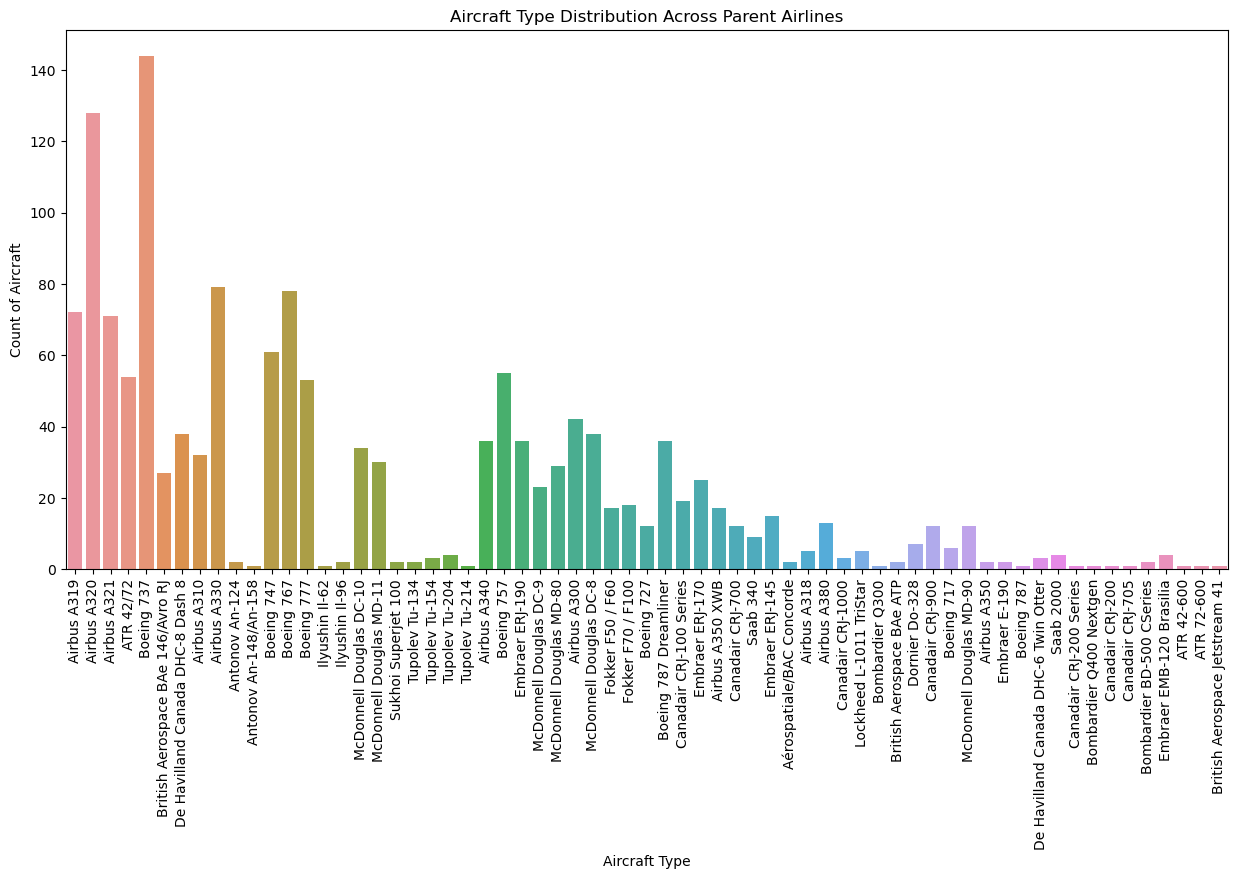

In [22]:
plt.figure(figsize=(15,7))
sb.countplot(x=df.Aircraft_Type)

plt.xlabel("Aircraft Type")
plt.ylabel("Count of Aircraft")
plt.title("Aircraft Type Distribution Across Parent Airlines")
plt.xticks(rotation=90)

plt.show()


## ✈️ Insights from Aircraft Type Distribution

  1. Boeing 737 and Airbus A320 Are the Most Common Aircraft Types

    - Boeing 737 (~144 aircraft) and Airbus A320 (~128 aircraft) are the two most frequently occurring aircraft types in the dataset.
    - These models are widely used for short- to medium-haul commercial routes, making them the backbone of many airline fleets globally.

  2. Airbus and Boeing Dominate the Market

    - A large portion of the chart is taken up by multiple Boeing and Airbus models (A319, A320, A321, A330, 747, 757, 767, 777, etc.).
    - This reflects their global market dominance, especially in the commercial aviation sector.

  3. Moderate Representation of Regional and Legacy Aircraft

    - Aircraft such as the ATR 42/72, Embraer ERJ-190, and McDonnell Douglas types appear in moderate numbers.
    - These types are often used by regional carriers or represent older fleets still in operation or historically included in the dataset.

  4. Long Tail of Rare Aircraft Types

    - Many aircraft types appear with very low frequencies, possibly:

     • Specialized aircraft
     • Cargo or military variants
     • Models being phased out or rarely used in commercial operations



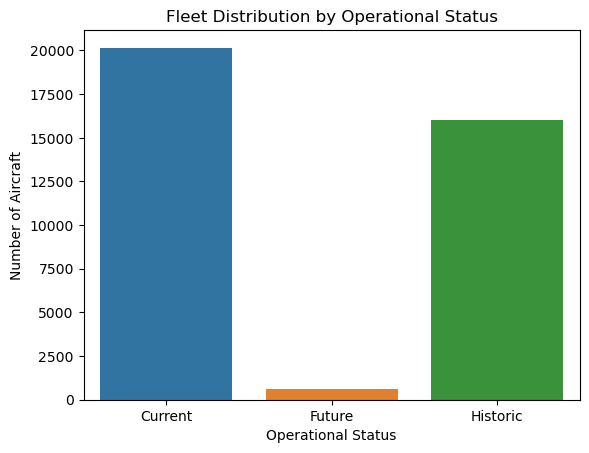

In [23]:
summ = df[['Current','Future','Historic']].sum()
sb.barplot(x = summ.index, y = summ.values)
plt.title("Fleet Distribution by Operational Status")
plt.xlabel("Operational Status")
plt.ylabel("Number of Aircraft")
plt.show()

['Aegean Airlines' 'Olympic Air' 'Aeroflot' 'Rossiya Airlines'
 'Aurora Airlines' 'Pobeda' 'Aerolineas Argentinas'
 'Austral Líneas Aéreas' 'Air Algerie' 'Air Arabia' 'Air Arabia Egypt'
 'Air Arabia Jordan' 'Air Arabia Maroc' 'Air Astana' 'Air Berlin'
 'Air Canada' 'Air Canada Jetz' 'Air Canada Rouge' 'Air Canada Regional'
 'Air Macau (66.9%)' 'Air China' 'Shenzhen Airlines'
 'Shandong Airlines (51%)' 'Air China Inner Mongolia'
 'Kunming Airlines (80%)' 'Dalian Airlines (80%)' 'Air China Cargo'
 'Air Europa' 'Air France' 'Transavia' 'KLM' 'Martinair'
 'Transavia France' 'HOP!' 'KLM Cityhopper' 'Air India'
 'Air India Regional' 'Air India Express' 'Air New Zealand'
 'Air New Zealand Link' 'Air Transat' 'Air Transport International'
 'ABX Air' 'Air Wisconsin' 'AirAsia' 'AirAsia India' 'AirAsia Japan'
 'Thai AirAsia' 'Indonesia AirAsia' 'Indonesia AirAsia X' 'AirAsia X'
 'Thai AirAsia X' 'Alaska Airlines' 'Horizon Air' 'Alitalia'
 'Alitalia Cityliner' 'Vanilla Air' 'ANA Wings' 'All Nippon

Enter Airline Name :  Air India


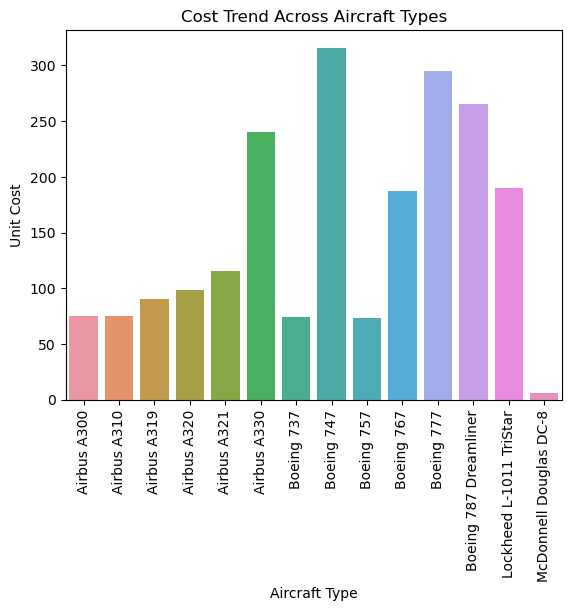

In [101]:
print(df.Airline.unique())
a = input("Enter Airline Name : ")
b = df[df.Airline == a]
sb.barplot(x = b.Aircraft_Type, y = b.Unit_Cost)
plt.xticks(rotation = 90)
plt.xlabel("Aircraft Type")
plt.ylabel("Unit Cost")
plt.title("Cost Trend Across Aircraft Types")
plt.show()

['Aegean Airlines' 'Aeroflot' 'Aerolineas Argentinas' 'Air Algerie'
 'Air Arabia' 'Air Astana' 'Air Berlin' 'Air Canada' 'Air China'
 'Air Europa' 'Air France/KLM' 'Air India' 'Air New Zealand' 'Air Transat'
 'Air Transport International' 'Air Transport Services' 'Air Wisconsin'
 'AirAsia' 'Alaska Airlines' 'Alitalia' 'All Nippon Airways'
 'Allegiant Air' 'American Airlines' 'Asiana Airlines' 'Atlas Air'
 'Avianca' 'Azul' 'Cathay Pacific' 'Cebu Pacific Air' 'China Airlines'
 'China Eastern Airlines' 'China Southern Airlines' 'Copa Airlines'
 'Delta Airlines' 'easyJet' 'EgyptAir' 'El Al' 'Emirates'
 'Ethiopian Airlines' 'Etihad Airways' 'EVA Air' 'FedEx Express' 'Finnair'
 'Flybe' 'FlyDubai' 'Frontier Airlines' 'Garuda Indonesia'
 'Gol Linhas Aéreas' 'Grupo Aeromexico' 'Gulf Air' 'Hainan Airlines'
 'Hawaiian Airlines' 'IAG' 'Iceland Air Group' 'IndiGo' 'Interjet'
 'Japan Airlines' 'Jazz Airlines' 'Jet Airways' 'Jet2' 'JetBlue'
 'Juneyao Airlines' 'Kenya Airways' 'Korean Air' 'LATAM Airl

Enter Parent Airline Name :  Air China


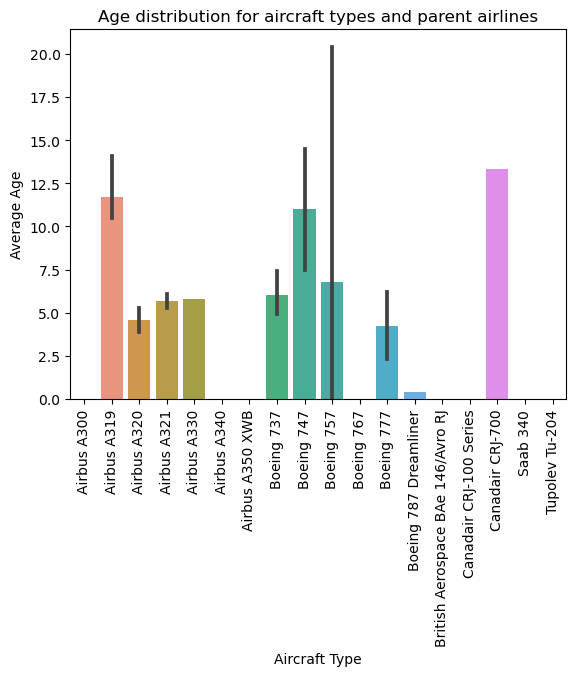

In [114]:
print(df.Parent_Airline.unique())
c = input("Enter Parent Airline Name : ")
d = df[df.Parent_Airline == c]
sb.barplot(x = d.Aircraft_Type, y = d.Average_Age)
plt.xticks(rotation = 90)
plt.xlabel("Aircraft Type")
plt.ylabel("Average Age")
plt.title("Age distribution for aircraft types and parent airlines")
plt.show()

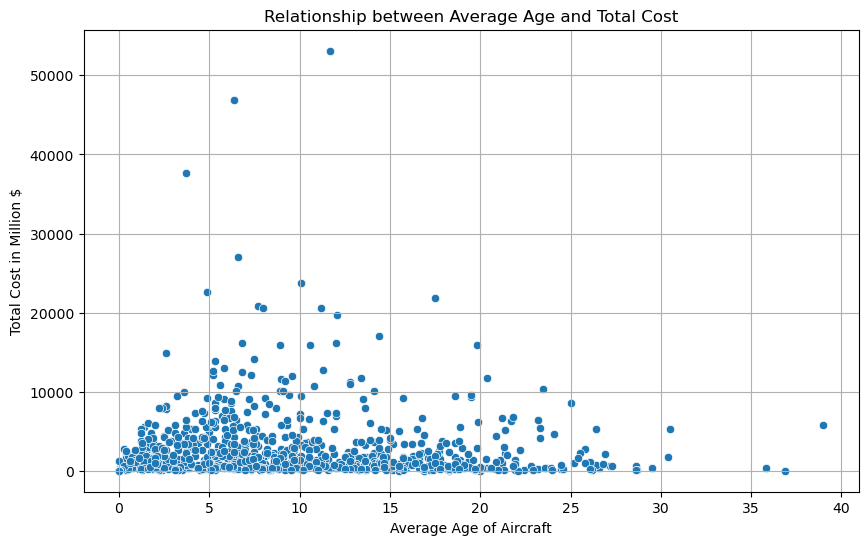

In [26]:
plt.figure(figsize = (10, 6))
sb.scatterplot(x = df.Average_Age, y = df.Total_Cost)
plt.xlabel("Average Age of Aircraft")
plt.ylabel("Total Cost in Million $")
plt.title("Relationship between Average Age and Total Cost")
plt.grid(True)
plt.show()

## 📈 Insights: Relationship Between Average Age and Total Cost of Aircraft

  1. Inverse Relationship Observed

    - The scatter plot shows a clear inverse trend:
     • Newer aircraft (lower average age) tend to have higher total costs.
     • Older aircraft are associated with lower total costs.
    - This is expected, as modern aircraft models are significantly more expensive due to advanced technology and fuel efficiency.

  2. Cost Concentration in Younger Fleets

    - Most data points with Total Cost > ₹10,000 million are concentrated where the average age is below 10 years.
    - Indicates that recent fleet acquisitions or modern fleets are more capital-intensive.

  3. Long-Tail of Older, Lower-Cost Aircraft

    - Aircraft with average ages above 20 years generally have lower total costs.
    - These are likely legacy fleets, possibly:
     • Fully depreciated assets
     • Secondary-market acquisitions
     • Converted for cargo or regional use

  4. Wide Cost Variance in Young Fleets

    - Even among younger fleets (0–10 years), there is a broad range in total costs.
    - This variation could be influenced by:
     • Fleet size differences
     • Aircraft types (wide-body vs narrow-body)
     • Purchase vs lease models

  5. Business Interpretation

    - Airlines aiming for fleet modernization must allocate significantly higher budgets.
    - Carriers with older fleets may benefit from lower capital expenses but may face higher maintenance or regulatory costs.

# Cost Analysis

In [28]:
df.groupby('Parent_Airline')['Total_Cost'].sum().nlargest(5)

Parent_Airline
American Airlines    121013.0
Lufthansa             92160.0
United Airlines       90037.0
IAG                   88814.0
Emirates              85191.0
Name: Total_Cost, dtype: float64

## 💸 Insights: Top 5 Airlines by Total Aircraft Cost

  1. American Airlines Leads with the Highest Total Investment

    - With a total cost of $121,013 million, American Airlines is the top spender on its fleet.
    - This indicates a large and/or modern fleet, suggesting:
     • Broad operational scale across domestic and international routes
     • Significant recent investments in new aircraft or upgrades

  2. Lufthansa and United Airlines Follow Closely

    - Lufthansa: $92,160 million.
    - United Airlines: $90,037 million.
    - These legacy carriers maintain diverse, mixed fleets, possibly combining long-haul wide-body and short-haul narrow-body aircraft.
    - Reflects their strong presence in global markets, especially Europe and North America.

  3. IAG Group and Emirates Also Among Top Spenders

    - IAG (which includes British Airways, Iberia, etc.): $88,814 million.
    - Emirates: $85,191 million.
    - Emirates’ high cost aligns with its premium long-haul fleet, including numerous wide-body aircraft like A380s and Boeing 777s.
    - IAG's cost suggests significant investments across multiple member airlines in its alliance.

  4. Interpretation: Capital-Intensive Global Players

    - All five airlines are major global carriers with extensive networks and frequent long-haul operations.
    - Their high total fleet cost reflects both:
     • Fleet size
     • Aircraft quality and modernity

  5. Operational Insight

    - These airlines may also face higher maintenance, financing, and depreciation costs, which must be justified by:
     • Higher passenger volumes
     • Efficient operations
     • Premium services

In [29]:
df.groupby(['Parent_Airline','Aircraft_Type'])['Unit_Cost'].sum().nlargest(20)

Parent_Airline        Aircraft_Type        
Lufthansa             Airbus A330              1555.0
Avianca               Airbus A330              1075.0
Air France/KLM        Boeing 747                948.0
IAG                   Boeing 747                948.0
LATAM Airlines Chile  Boeing 767                935.0
TUI Group             Boeing 767                935.0
Lufthansa             Boeing 777                885.0
                      Airbus A320               882.0
                      Airbus A340               864.0
TUI Group             Boeing 787 Dreamliner     795.0
IAG                   Boeing 767                748.0
AirAsia               Airbus A330               720.0
Air China             Boeing 747                632.0
Cathay Pacific        Boeing 747                632.0
China Airlines        Boeing 747                632.0
Lufthansa             Boeing 747                632.0
Singapore Airlines    Boeing 747                632.0
Lufthansa             Airbus A319     

## 💡 Insights: High-Cost Aircraft Investments by Airlines

  1. Lufthansa Dominates the Chart

    - Lufthansa appears multiple times across various aircraft types (Airbus A330, A320, A340, A319, Boeing 747, 777), reflecting:
     • A diversified, high-cost fleet.
     • Significant investments across both Airbus and Boeing models.

  2. Airbus A330 Is a High-Investment Aircraft

    - Top entries like Lufthansa (1555.0) and Avianca (1075.0) show major spending on the A330.
    - Indicates the A330 is a preferred wide-body aircraft for international carriers.

  3. Boeing 747 Appears Most Frequently

    - The Boeing 747 is listed with multiple airlines (Air France/KLM, IAG, Air China, Cathay Pacific, China Airlines, Lufthansa, Singapore Airlines), suggesting:
     • Continued reliance on the 747 for long-haul and high-capacity routes.
     • Despite age, still represents a large capital investment for many carriers.

  4. High Spending from Latin America and Asia

    - LATAM Airlines Chile, TUI Group, AirAsia, Air China, and Singapore Airlines are among the top 20, showing:
     • Active investment in fleet modernization in these regions.
     • Boeing 767, 777, and 787 Dreamliner are popular choices.

  5. Focus on Long-Haul Wide-Body Aircraft

    - Most aircraft types listed are long-haul models (e.g., Boeing 747, 777, 787, Airbus A330, A340).
    - Suggests that the highest spending occurs in building capacity for international operations.



In [116]:
df.groupby('Parent_Airline')[['Future', 'Total_Cost']].sum().nlargest(10, 'Total_Cost')

,Future,Total_Cost
Parent_Airline,,
American Airlines,62.0,121013.0
Lufthansa,28.0,92160.0
United Airlines,38.0,90037.0
IAG,10.0,88814.0
Emirates,20.0,85191.0
Delta Airlines,18.0,84585.0
Air China,11.0,80232.0
Air France/KLM,7.0,75128.0
China Eastern Airlines,7.0,64702.0


## ✈️ Insights: Total Cost vs Future Fleet Orders (Top 10 Airlines)

  1. American Airlines Leads in Both Cost & Future Orders

    - $121,013M in total cost and 62 future aircraft — highest in both categories.
    - Indicates aggressive fleet expansion and modernization strategy.

  2. Lufthansa & United Airlines: High Spend, Moderate Growth

    - Lufthansa: $92,160M with 28 future aircraft.
    - United Airlines: $90,037M with 38 future aircraft.
    - Both show strong capital investment with steady future growth plans.

  3. IAG & Emirates Focused on High-Value Fleets

    - IAG: $88,814M with just 10 future aircraft.
    - Emirates: $85,191M and 20 future aircraft.
    - Suggests premium aircraft acquisitions or long-haul upgrades.

  4. Delta & Air China Also Invested in Fleet Expansion

    - Delta: $84,585M, 18 future aircraft.
    - Air China: $80,232M, 11 future aircraft.
    - Reflects competitive investment in both infrastructure and fleet.

  5. China & Europe Are Well Represented

    - Air France/KLM, China Eastern, and China Southern round out the top 10.
    - Indicates global investment trends, especially from European alliances and Chinese carriers.

# Correlation and Anomaly Detection

In [32]:
df["Total_Cost"].corr(df.Orders)

0.5285987120423665

Total Cost vs Total Fleet (0.6999) – Strong Positive Correlation

    - Interpretation: The higher the total number of aircraft, the higher the total cost incurred.
    - Insight: Fleet size is a major cost driver for airlines.

In [33]:
df["Average_Age"].corr(df.Total_Cost)

0.22898772775114123

Total Cost vs Orders (0.5286) – Moderate Positive Correlation

    - Interpretation: Airlines with more aircraft on order tend to have higher total costs.
    - Insight: Reflects investment in expansion or fleet modernization.

In [34]:
df["Total"].corr(df.Total_Cost)

0.6999250563422358

Total Cost vs Average Age (0.2289) – Weak Positive Correlation

    - Interpretation: Older fleets are slightly associated with higher costs.
    - Insight: Possibly due to maintenance and operational costs, but not a dominant factor.

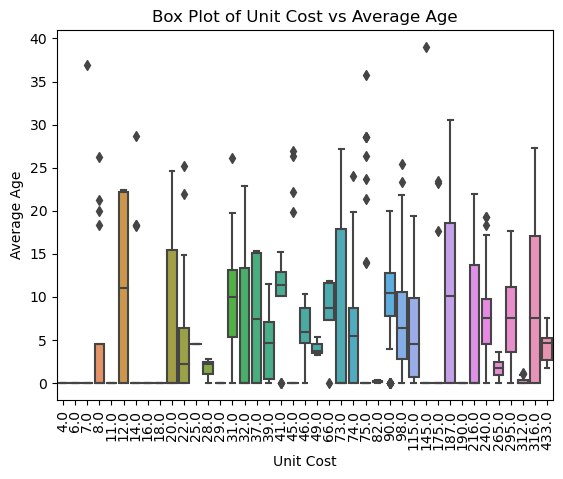

In [35]:
sb.boxplot(x = df.Unit_Cost, y = df.Average_Age)
plt.xlabel("Unit Cost")
plt.ylabel("Average Age")
plt.title("Box Plot of Unit Cost vs Average Age")
plt.xticks(rotation = 90)
plt.show()

## 📊 Insights from Box Plot: Unit Cost vs Average Age

  1. Newer Aircraft Tend to Cost More

    - Aircraft with higher unit costs (200–430 million) have lower average ages, indicating they are newer models.
    - This aligns with expectations — newer planes cost more due to advanced tech and inflation.

  2. Older Aircraft Are Cheaper

    - Unit costs below 100 million show wider age ranges, often including aircraft 15–30 years old.
    - These likely represent older generations or retired aircraft still present in historic records.

  3. High Age Variance at Mid Costs

    - For unit costs around 70–150 million, the spread in age is largest, suggesting these cost brackets include both old and new models.
    - Could represent widely adopted aircraft types used for many years.

  4. Outliers Indicate Exceptions

    - Presence of older aircraft with high cost and younger aircraft with low cost shows exceptions exist — possibly due to special configurations, refurbishments, or data anomalies.

<Axes: >

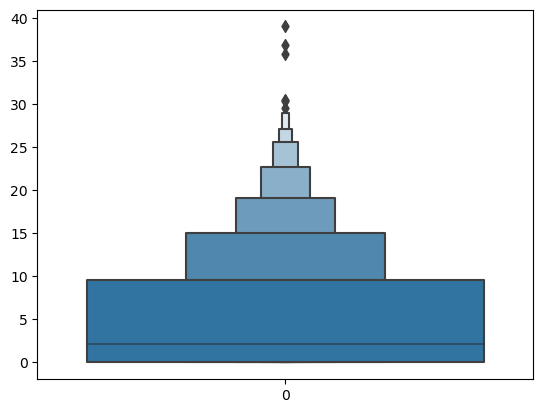

In [36]:
sb.boxenplot(df.Average_Age)

In [37]:
i = 'Average_Age'
q1 = np.percentile(df[i],25)
q3 = np.percentile(df[i],75)
iqr = q3 - q1
cr1 = q1 - 1.5 * iqr
cr2 = q3 + 1.5 * iqr
w = df[(df[i] < cr1) | (df[i] > cr2)]

In [38]:
df_cleaned = df[(df[i] >= cr1) & (df[i] <= cr2)]

print("Original Dataset Shape:", df.shape)
print("Cleaned Dataset Shape:", df_cleaned.shape)

Original Dataset Shape: (1451, 11)
Cleaned Dataset Shape: (1420, 11)


<Axes: >

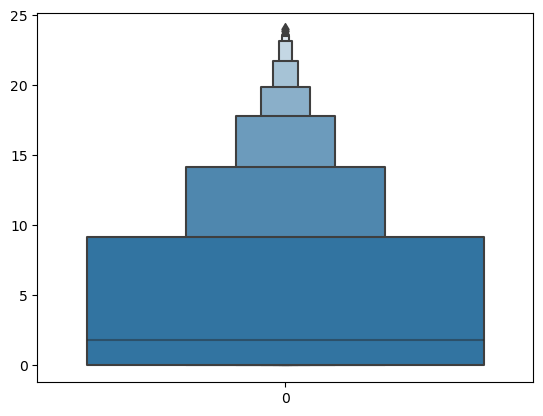

In [39]:
sb.boxenplot(df_cleaned.Average_Age)

In [40]:
df[['Current', 'Future', 'Historic','Total']].isnull().sum()

Current     0
Future      0
Historic    0
Total       0
dtype: int64

In [41]:
df[df[['Current', 'Future', 'Historic','Total']] < 0]

,Parent_Airline,Airline,Aircraft_Type,Current,Future,Historic,Total,Orders,Unit_Cost,Total_Cost,Average_Age
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


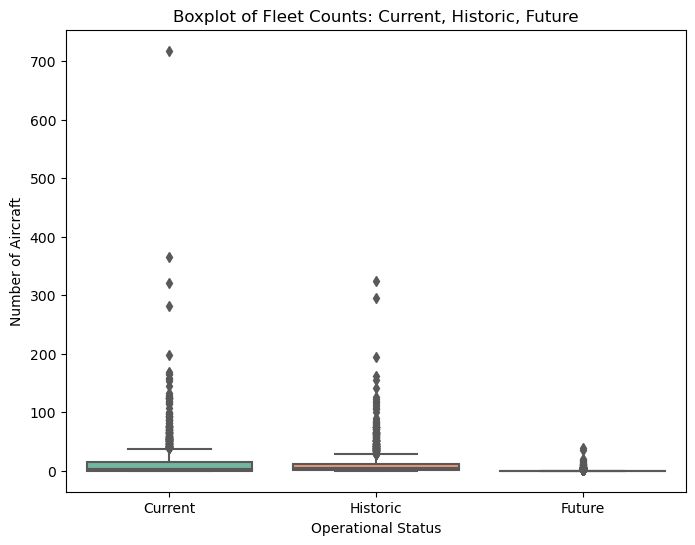

In [94]:
boxplot = df[['Current', 'Historic', 'Future']]

plt.figure(figsize=(8, 6))
sb.boxplot(x='Status', y='Count', data=df_melted, palette='Set2')

plt.title("Boxplot of Fleet Counts: Current, Historic, Future")
plt.xlabel("Operational Status")
plt.ylabel("Number of Aircraft")
plt.show()

## ✈️ Insights:

  1. Current Aircraft Dominate the Dataset

    - The Current status has the highest median number of aircraft per entry.
    - It also shows several high outliers, with some entries reporting more than 700 aircraft.

  2. Historic Aircraft Also Substantial

    - Historic aircraft have a moderate median fleet size.
    - Several airlines show high past fleet sizes, possibly indicating retired fleets or mergers.
 
  3. Future Orders Are Sparse

    - The Future status has the lowest median and narrowest IQR (interquartile range).
    - This suggests that future orders are still limited, with most entries having low or zero values.

  4. Presence of Extreme Outliers

    - All three categories show outliers, but Current and Historic have more extreme values.
    - These may represent large airline groups or data recording of fleets under shared ownership.